In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# ドライブのマウント
drive.mount('/content/drive')
common_path = '/content/drive/MyDrive/img2025/image/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


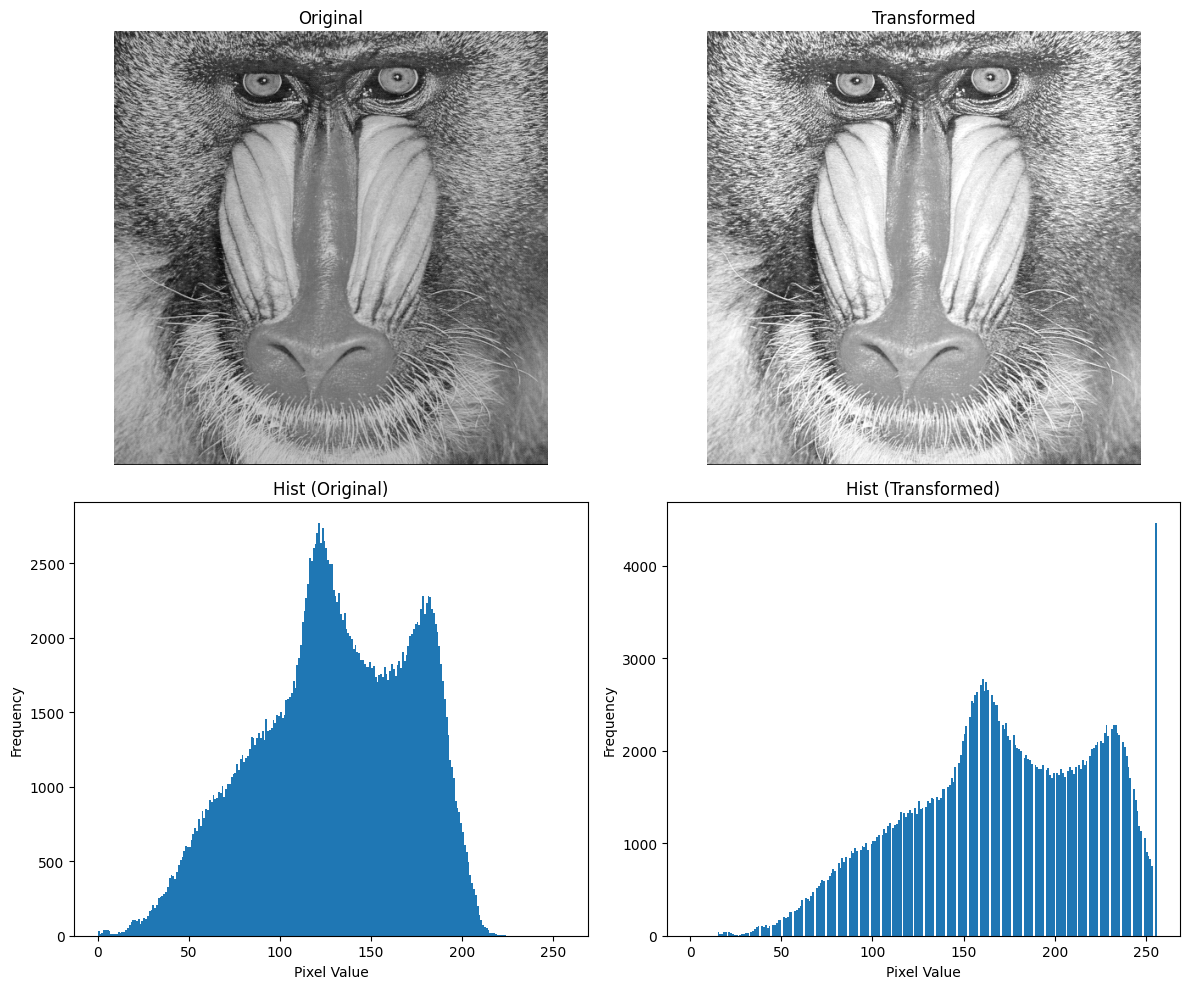

True

In [5]:

# ----------------------------------------------------------------
# 課題1: 線形変換による濃度変換
# ----------------------------------------------------------------

# 画像読み込み
src = cv2.imread(common_path + 'gray_image.png', cv2.IMREAD_GRAYSCALE)

# 出力用配列の初期化
H, W = src.shape
dst = np.zeros((H, W), dtype=np.uint8)

# 画素ごとの濃度変換処理
# f: 入力画素値, g: 出力画素値
for y in range(H):
    for x in range(W):
        f = src[y, x]

        # 変換式: f <= 200 なら 1.2f + 15, それ以外は 255
        if f <= 200:
            g = 1.2 * f + 15
        else:
            g = 255

        dst[y, x] = int(g)

# 結果表示
plt.figure(figsize=(12, 10))

# 元画像
plt.subplot(2, 2, 1)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

# 変換後画像
plt.subplot(2, 2, 2)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.title('Transformed')
plt.axis('off')

# 元画像のヒストグラム
plt.subplot(2, 2, 3)
plt.hist(src.ravel(), bins=256, range=[0, 256])
plt.title('Hist (Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 変換後画像のヒストグラム
plt.subplot(2, 2, 4)
plt.hist(dst.ravel(), bins=256, range=[0, 256])
plt.title('Hist (Transformed)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 画像保存
cv2.imwrite('transformed_image.png', dst)

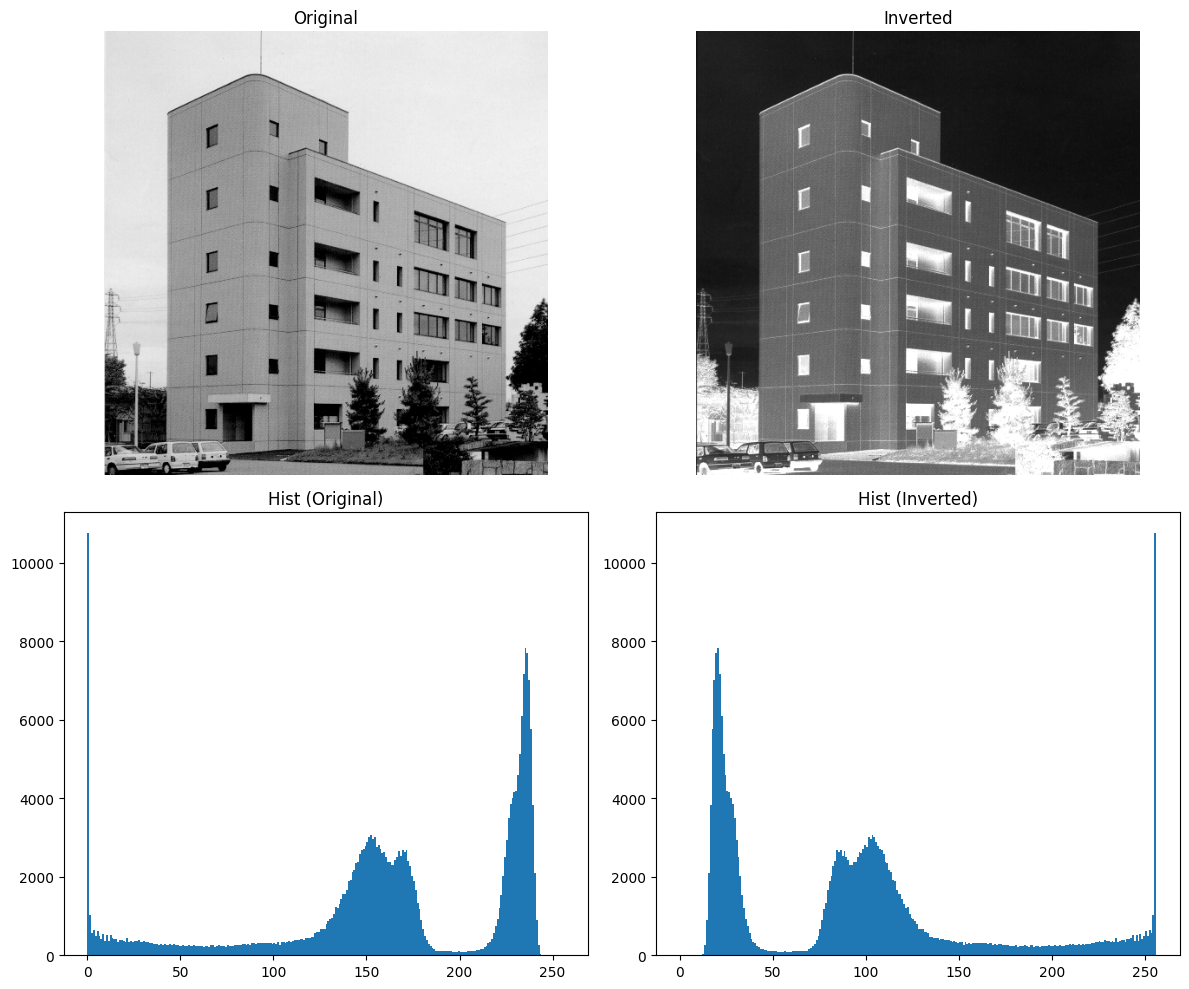

True

In [6]:
# ----------------------------------------------------------------
# 課題2: 輝度反転
# ----------------------------------------------------------------

# 画像読み込み
src = cv2.imread(common_path + 'building.png', cv2.IMREAD_GRAYSCALE)

# 出力用配列の初期化
H, W = src.shape
dst = np.zeros((H, W), dtype=np.uint8)

# 画素ごとの反転処理
for y in range(H):
    for x in range(W):
        f = src[y, x]
        g = 255 - f
        dst[y, x] = g

# 結果表示
plt.figure(figsize=(12, 10))

# 元画像
plt.subplot(2, 2, 1)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

# 反転画像
plt.subplot(2, 2, 2)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.title('Inverted')
plt.axis('off')

# ヒストグラム表示
plt.subplot(2, 2, 3)
plt.hist(src.ravel(), bins=256, range=[0, 256])
plt.title('Hist (Original)')

plt.subplot(2, 2, 4)
plt.hist(dst.ravel(), bins=256, range=[0, 256])
plt.title('Hist (Inverted)')

plt.tight_layout()
plt.show()

# 画像保存
cv2.imwrite('inverted_image.png', dst)

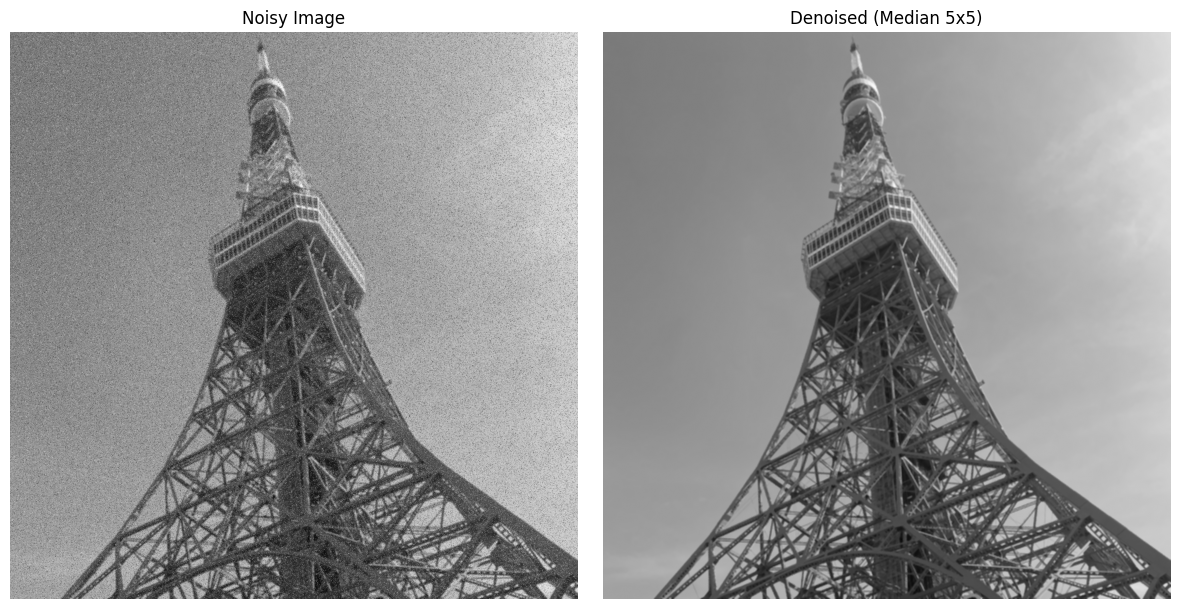

True

In [7]:
# ----------------------------------------------------------------
# 課題3: メディアンフィルタによるノイズ除去
# ----------------------------------------------------------------

# 画像読み込み
src = cv2.imread(common_path + 'noisy_image.png', cv2.IMREAD_GRAYSCALE)

# フィルタサイズ設定 (5x5)
ksize = 5

# メディアンフィルタ適用
dst = cv2.medianBlur(src, ksize)

# 結果表示
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray', vmin=0, vmax=255)
plt.title(f'Denoised (Median {ksize}x{ksize})')
plt.axis('off')

plt.tight_layout()
plt.show()

# 画像保存
cv2.imwrite(common_path + 'denoised_image.png', dst)

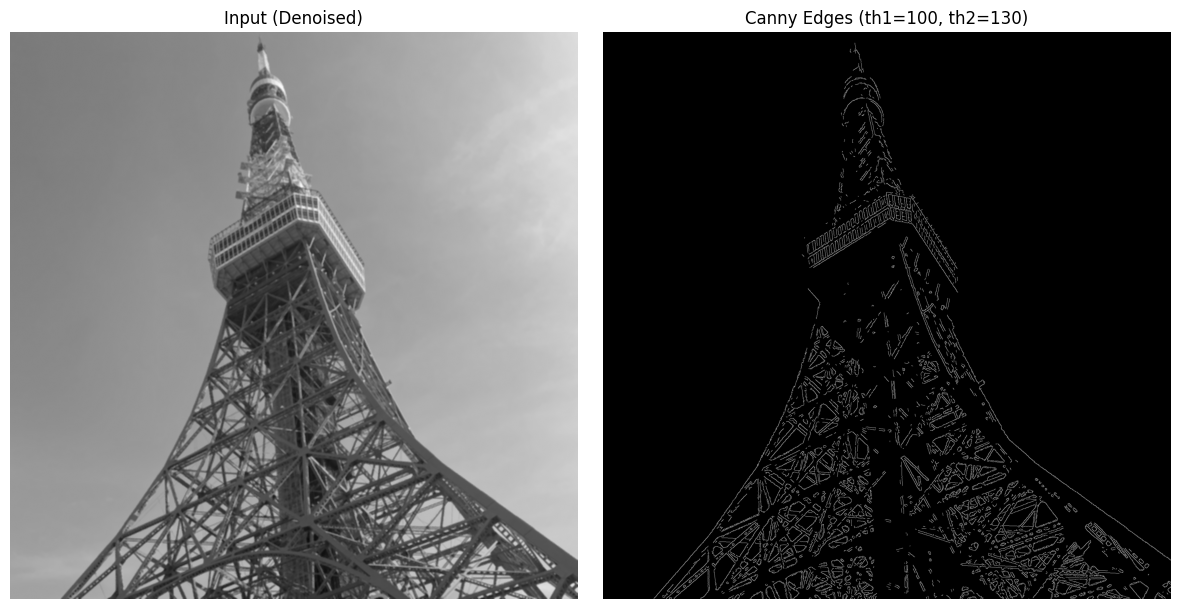

True

In [8]:
# ----------------------------------------------------------------
# 課題4: Canny法によるエッジ検出
# ----------------------------------------------------------------

# ノイズ除去済み画像の読み込み
src = cv2.imread(common_path + 'denoised_image.png', cv2.IMREAD_GRAYSCALE)

# しきい値の設定
thresh1 = 100
thresh2 = 130

# エッジ検出実行
edges = cv2.Canny(src, thresh1, thresh2)

# 結果表示
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.title('Input (Denoised)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title(f'Canny Edges (th1={thresh1}, th2={thresh2})')
plt.axis('off')

plt.tight_layout()
plt.show()

# 画像保存
cv2.imwrite(common_path + 'canny_edge_image.png', edges)